In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sp-500-stocks/sp500_stocks.csv
/kaggle/input/sp-500-stocks/sp500_companies.csv
/kaggle/input/sp-500-stocks/sp500_index.csv


In [2]:
import pandas as pd

# Load the CSV files into DataFrames
stocks_df = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_stocks.csv')
companies_df = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_companies.csv')
index_df = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_index.csv')

In [3]:
# Explore the stocks DataFrame
print("Stocks DataFrame:")
print(stocks_df.head())      # Preview first 5 rows
print(stocks_df.info())      # Overview of the DataFrame structure
print(stocks_df.describe())  # Summary statistics for numeric columns

Stocks DataFrame:
         Date Symbol  Adj Close  Close  High  Low  Open  Volume
0  2010-01-04    MMM        NaN    NaN   NaN  NaN   NaN     NaN
1  2010-01-05    MMM        NaN    NaN   NaN  NaN   NaN     NaN
2  2010-01-06    MMM        NaN    NaN   NaN  NaN   NaN     NaN
3  2010-01-07    MMM        NaN    NaN   NaN  NaN   NaN     NaN
4  2010-01-08    MMM        NaN    NaN   NaN  NaN   NaN     NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891536 entries, 0 to 1891535
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Symbol     object 
 2   Adj Close  float64
 3   Close      float64
 4   High       float64
 5   Low        float64
 6   Open       float64
 7   Volume     float64
dtypes: float64(6), object(2)
memory usage: 115.5+ MB
None


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


           Adj Close          Close           High            Low  \
count  617831.000000  617831.000000  617831.000000  617831.000000   
mean       79.672357      87.471540      88.417844      86.480997   
std       102.742931     104.521901     105.684113     103.300770   
min         0.203593       0.222000       0.226250       0.216250   
25%        26.572459      32.700001      33.060001      32.299999   
50%        49.821613      59.139999      59.720001      58.500000   
75%        94.831036     105.019997     106.129997     103.889999   
max      1702.530029    1702.530029    1714.750000    1696.900024   

                Open        Volume  
count  617831.000000  6.178310e+05  
mean       87.460302  9.347125e+06  
std       104.519845  4.771669e+07  
min         0.218000  0.000000e+00  
25%        32.689999  1.144000e+06  
50%        59.119999  2.453400e+06  
75%       105.000000  5.657850e+06  
max      1706.400024  3.692928e+09  


In [4]:
# Explore the companies DataFrame
print("\nCompanies DataFrame:")
print(companies_df.head())
print(companies_df.info())
print(companies_df.describe())


Companies DataFrame:
  Exchange Symbol              Shortname               Longname  \
0      NMS   AAPL             Apple Inc.             Apple Inc.   
1      NMS   NVDA     NVIDIA Corporation     NVIDIA Corporation   
2      NMS   MSFT  Microsoft Corporation  Microsoft Corporation   
3      NMS   AMZN       Amazon.com, Inc.       Amazon.com, Inc.   
4      NMS  GOOGL          Alphabet Inc.          Alphabet Inc.   

                   Sector                        Industry  Currentprice  \
0              Technology            Consumer Electronics        254.49   
1              Technology                  Semiconductors        134.70   
2              Technology       Software - Infrastructure        436.60   
3       Consumer Cyclical                 Internet Retail        224.92   
4  Communication Services  Internet Content & Information        191.41   

       Marketcap        Ebitda  Revenuegrowth           City State  \
0  3846819807232  1.346610e+11          0.061      Cup

In [5]:
# Explore the index DataFrame
print("\nIndex DataFrame:")
print(index_df.head())
print(index_df.info())
print(index_df.describe())


Index DataFrame:
         Date   S&P500
0  2014-12-22  2078.54
1  2014-12-23  2082.17
2  2014-12-24  2081.88
3  2014-12-26  2088.77
4  2014-12-29  2090.57
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   S&P500  2517 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB
None
            S&P500
count  2517.000000
mean   3346.351605
std    1078.204274
min    1829.080000
25%    2428.370000
50%    2999.910000
75%    4199.120000
max    6090.270000


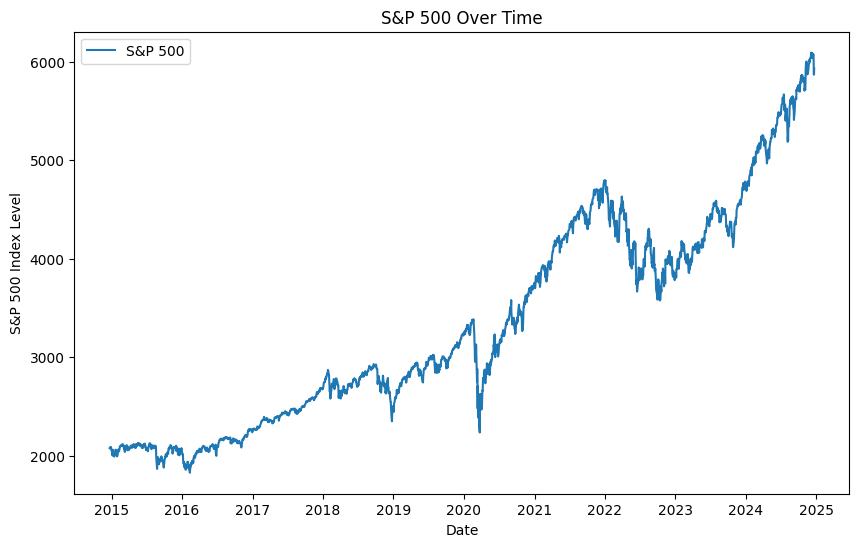

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume index_df is already loaded
# For example:
# index_df = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_index.csv')

# 1. Convert 'Date' column to datetime
index_df['Date'] = pd.to_datetime(index_df['Date'])

# 2. Plot the data
plt.figure(figsize=(10, 6))
plt.plot(index_df['Date'], index_df['S&P500'], label='S&P 500')

# 3. Label axes and title
plt.xlabel('Date')
plt.ylabel('S&P 500 Index Level')
plt.title('S&P 500 Over Time')
plt.legend()

# 4. Display the plot
plt.show()